In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./archive/OLX_Car_Data_CSV.csv', encoding= 'unicode_escape')

In [3]:
df.head()

,Brand,Condition,Fuel,KMs Driven,Model,Price,Registered City,Transaction Type,Year
0,Toyota,Used,Diesel,1.0,Prado,2100000,Karachi,Cash,1997.0
1,Suzuki,Used,Petrol,100000.0,Bolan,380000,Karachi,Cash,2006.0
2,Suzuki,Used,CNG,12345.0,Bolan,340000,Karachi,Cash,1998.0
3,Suzuki,Used,Petrol,94000.0,Alto,535000,Karachi,Cash,2010.0
4,Toyota,Used,Petrol,100000.0,Corolla XLI,1430000,Karachi,Cash,2013.0


In [4]:
df['Model'].unique()

array(['Prado', 'Bolan', 'Alto', 'Corolla XLI', 'Corrolla Altis',
       'Cultus VXL', 'Civic VTi', 'Khyber', 'Liana', 'Passo',
       'Civic Prosmetic', 'Civic EXi', 'Charade', 'Pajero Mini',
       'Margalla', 'City IVTEC', 'Classic', 'Other', 'Corolla GLI',
       'Cultus VXR', 'Dayz Highway Star', 'Mehran VX', 'Vitz',
       'Mehran VXR', 'Carry', 'Cultus VX', 'Baleno', 'Mira',
       'Civic VTi Oriel Prosmatec', 'Cuore', 'Corolla 2.0 D',
       'Corolla XE', 'Surf', 'FX', 'City IDSI', 'Premio', 'Sprinter',
       '3 Series', 'Hilux', 'Lancer', 'Swift', 'Estima', 'Vamos',
       'Starlet', 'Prius', 'Joy', '323', 'Racer', 'Sunny', 'Accord',
       'Zest', 'AD Van', 'APV', 'March', 'Pride', 'Sportage',
       'Terios Kid', 'Santro', 'Fit', 'V2', 'City Aspire',
       'Civic VTi Oriel', 'BR-V', 'Kei', 'Probox', 'Hijet', '86', 'Yaris',
       'Aygo', 'Rush', 'Dayz', 'Fortuner', 'Every', 'Camry', 'Aqua',
       'Corolla Assista', 'Sera', 'Acty', 'Moco', 'Wagon R', 'Smart',
       'Demio

In [5]:
df['Registered City'].unique()

array(['Karachi', 'Hyderabad', 'Bagh', 'Sukkar', 'Bahawalnagar', 'Lahore',
       'Askoley', 'Khanpur', 'Quetta', 'Karak', 'Islamabad', 'Sialkot',
       'Pakpattan', 'Lasbela', 'Sukkur', 'Rawalpindi', 'Bahawalpur',
       'Ali Masjid', 'Multan', nan, 'Khaplu', 'Tank', 'Badin',
       'Rahimyar Khan', 'Chilas', 'Kasur', 'Khushab', 'Vehari', 'Chitral',
       'Khanewal', 'Attock', 'Larkana', 'Bela', 'Khairpur', 'Kandhura',
       'Abbottabad', 'Nawabshah', 'Bhimber', 'Mardan', 'Chiniot',
       'Faisalabad', 'Sahiwal', 'Haripur', 'Peshawar', 'Kohat',
       'Sargodha', 'Jhelum', 'Gujrat', 'Nowshera', 'Gujranwala', 'Mirpur',
       'Burewala', 'Mandi Bahauddin', 'Muzaffargarh', 'Wah',
       'Dera Ghazi Khan', 'Sheikhüpura', 'Okara', 'Dera Ismail Khan',
       'Swat', 'Swabi', 'Muzaffarabad'], dtype=object)

In [6]:
df.shape

(24973, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24973 entries, 0 to 24972
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             22836 non-null  object 
 1   Condition         22837 non-null  object 
 2   Fuel              22528 non-null  object 
 3   KMs Driven        22687 non-null  float64
 4   Model             22525 non-null  object 
 5   Price             24973 non-null  int64  
 6   Registered City   20337 non-null  object 
 7   Transaction Type  22528 non-null  object 
 8   Year              22689 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 1.7+ MB


In [8]:
df.describe()

,KMs Driven,Price,Year
count,2.268700e+04,2.497300e+04,22689.000000
mean,1.278112e+05,9.128953e+05,2005.901626
std,5.996726e+05,1.537134e+06,9.563804
min,1.000000e+00,5.000000e+04,1915.000000
25%,1.600000e+04,3.800000e+05,2002.000000
50%,6.651000e+04,6.500000e+05,2008.000000
75%,1.000000e+05,1.145000e+06,2013.000000
max,1.000000e+07,8.765432e+07,2020.000000


# Data Cleaning

In [9]:
df.isnull().sum()

Brand               2137
Condition           2136
Fuel                2445
KMs Driven          2286
Model               2448
Price                  0
Registered City     4636
Transaction Type    2445
Year                2284
dtype: int64

In [10]:
df.columns

Index(['Brand', 'Condition', 'Fuel', 'KMs Driven', 'Model', 'Price',
       'Registered City', 'Transaction Type', 'Year'],
      dtype='object')

In [11]:
#As we see most of the null values are from Registered City column
#Also the most of the cars are registered from Karachi so we'll gonna replace nan with Karachi
df['Registered City'].fillna(value='Karachi', inplace=True)

In [12]:
#And most of the fuel are from petrol so we'll gonna replace nan with Petrol
df['Fuel'].fillna(value='Petrol', inplace=True)

In [13]:
#And most of the Transactions are from Cash so we'll gonna replace nan with Cash
df['Transaction Type'].fillna(value='Cash', inplace=True)

In [14]:
#And most of the Cars are used so we'll gonna replace nan with Used
df['Condition'].fillna(value='Used', inplace=True)

In [15]:
#And most of the Cars are of Suzuki Brand so we'll gonna replace nan with Suzuki
df['Brand'].fillna(value='Suzuki', inplace=True)

In [16]:
#Here we are filling our Model nan values with Cultus and Alto Values because these have most value counts in dataset
mask = df['Model'].isna() 
ind = df['Model'].loc[mask].sample(frac=0.55).index
df.loc[ind, 'Model'] = 'Cultus VXR'
df['Model'] = df['Model'].fillna("Alto")

In [17]:
df['Model'].value_counts().head()

Cultus VXR     3121
Alto           2760
Corolla GLI    1043
Mehran VX      1025
Other           920
Name: Model, dtype: int64

In [18]:
#we are filling KMs Driven null value with mean of all KMs Driven Values
df['KMs Driven'].fillna((df['KMs Driven'].mean()),inplace = True)

In [19]:
df['Year'].value_counts()

2015.0    1448
2007.0    1423
2006.0    1373
2014.0    1294
2013.0    1178
          ... 
1956.0       1
1968.0       1
2019.0       1
1915.0       1
1960.0       1
Name: Year, Length: 65, dtype: int64

In [20]:
#Here we are filling our Year nan values with 2015 and 2007 Values because these have most value counts in dataset
mask = df['Year'].isna()
ind = df['Year'].loc[mask].sample(frac=0.52).index
df.loc[ind, 'Year'] = 2015.0
df['Year'] = df['Year'].fillna(2007.0)

In [21]:
df['Year'].value_counts()

2015.0    2636
2007.0    2519
2006.0    1373
2014.0    1294
2013.0    1178
          ... 
1956.0       1
1968.0       1
2019.0       1
1915.0       1
1960.0       1
Name: Year, Length: 65, dtype: int64

In [22]:
df.isnull().sum()

Brand               0
Condition           0
Fuel                0
KMs Driven          0
Model               0
Price               0
Registered City     0
Transaction Type    0
Year                0
dtype: int64

# Exploratory Data Analysis

In [23]:
df['Brand'].value_counts()

Suzuki                11910
Toyota                 4981
Honda                  3324
Daihatsu               2476
Nissan                  745
Mitsubishi              435
Hyundai                 268
Other Brands            188
KIA                     133
Mazda                    98
Mercedes                 92
FAW                      80
Daewoo                   72
Chevrolet                47
BMW                      31
Lexus                    23
Subaru                   20
Audi                     18
Classic & Antiques       13
Changan                   9
Range Rover               7
Porsche                   2
Land Rover                1
Name: Brand, dtype: int64

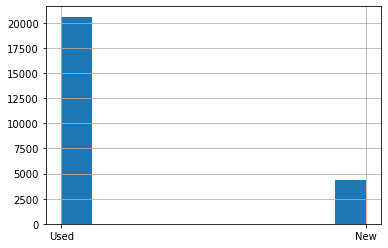

In [24]:
df['Condition'].hist()

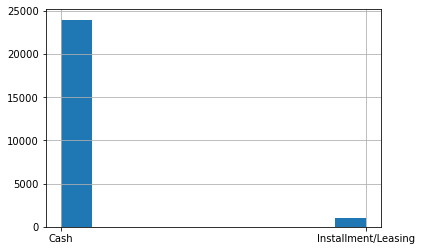

In [25]:
df['Transaction Type'].hist()

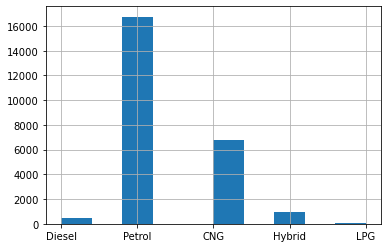

In [26]:
df['Fuel'].hist()

In [27]:
df['Fuel'].value_counts()

Petrol    16754
CNG        6797
Hybrid      943
Diesel      450
LPG          29
Name: Fuel, dtype: int64

In [28]:
df['Year'].value_counts()

2015.0    2636
2007.0    2519
2006.0    1373
2014.0    1294
2013.0    1178
          ... 
1956.0       1
1968.0       1
2019.0       1
1915.0       1
1960.0       1
Name: Year, Length: 65, dtype: int64

In [29]:
df['Model'].value_counts()

Cultus VXR       3121
Alto             2760
Corolla GLI      1043
Mehran VX        1025
Other             920
                 ... 
Vogue               1
B2200               1
MR2                 1
cars-other-23       1
Safari              1
Name: Model, Length: 303, dtype: int64

In [30]:
df['Model'].value_counts().head(10)

Cultus VXR     3121
Alto           2760
Corolla GLI    1043
Mehran VX      1025
Other           920
Mehran VXR      790
Bolan           702
Khyber          670
Vitz            612
Mira            606
Name: Model, dtype: int64

In [31]:
df['Registered City'].value_counts()

Karachi         21235
Lahore           1986
Islamabad         986
Rawalpindi        163
Multan            112
                ...  
Khaplu              1
Muzaffarabad        1
Sheikhüpura         1
Swat                1
Chiniot             1
Name: Registered City, Length: 61, dtype: int64

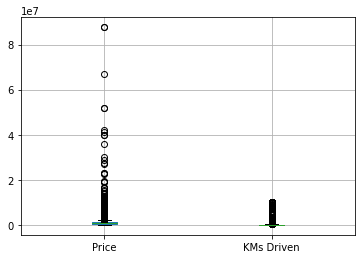

In [32]:
df.boxplot(column = ['Price','KMs Driven'])

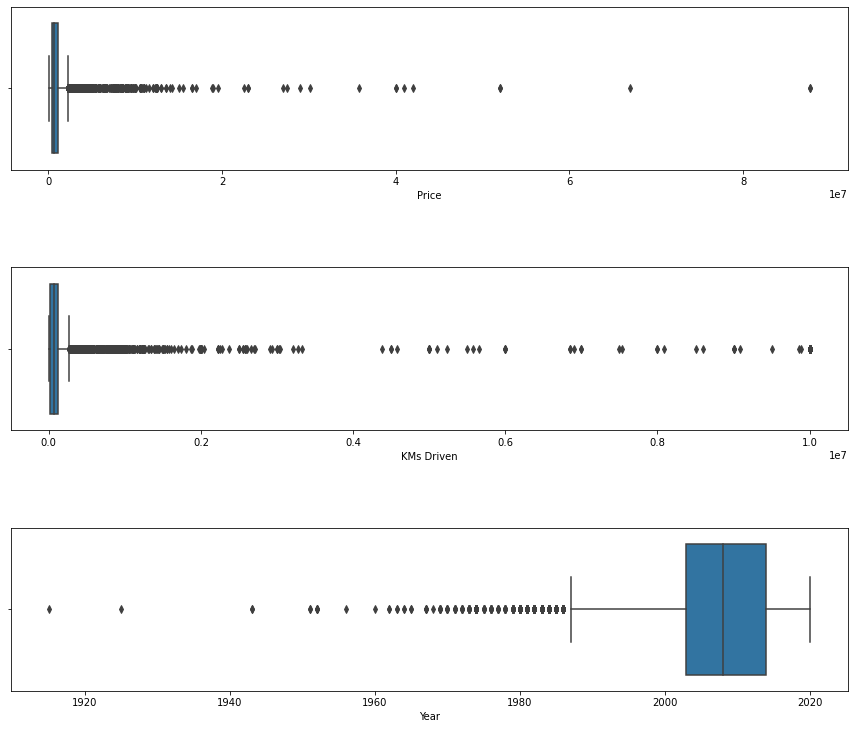

In [33]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(15,20))
sns.boxplot(x=df['Price'], data=df, ax=ax1)
sns.boxplot(x=df['KMs Driven'], data=df, ax=ax2)
sns.boxplot(x=df['Year'], data=df, ax=ax3)
plt.subplots_adjust(hspace = 0.6, top = 0.6)
plt.show()

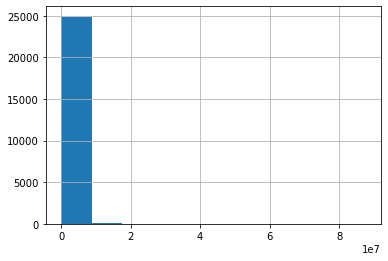

In [34]:
df['Price'].hist()

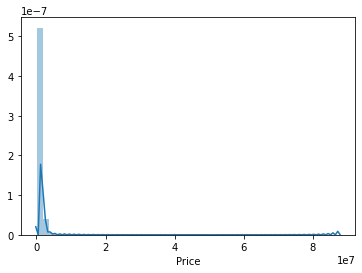

In [35]:
sns.distplot(df['Price'])

In [36]:
df.nlargest(3, ['Price'])

,Brand,Condition,Fuel,KMs Driven,Model,Price,Registered City,Transaction Type,Year
23095,Suzuki,New,Petrol,900.0,Ravi,87654321,Rawalpindi,Cash,2018.0
23116,Suzuki,New,Petrol,900.0,Ravi,87654321,Rawalpindi,Cash,2018.0
19688,Toyota,New,Petrol,32222.0,Land Cruiser,67000000,Karachi,Cash,2017.0


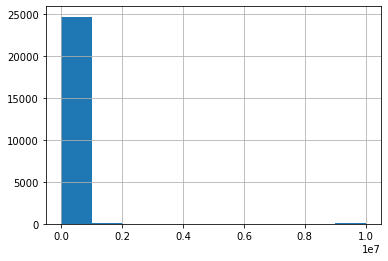

In [37]:
df['KMs Driven'].hist()

In [38]:
df['KMs Driven'].max()

10000000.0

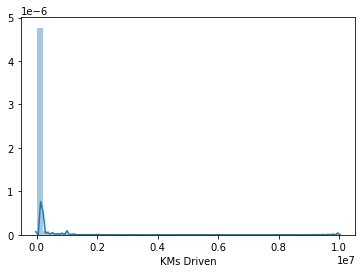

In [39]:
sns.distplot(df['KMs Driven'])

In [40]:
df['Log_Price'] = np.log(df['Price'])
df

,Brand,Condition,Fuel,KMs Driven,Model,Price,Registered City,Transaction Type,Year,Log_Price
0,Toyota,Used,Diesel,1.0,Prado,2100000,Karachi,Cash,1997.0,14.557448
1,Suzuki,Used,Petrol,100000.0,Bolan,380000,Karachi,Cash,2006.0,12.847927
2,Suzuki,Used,CNG,12345.0,Bolan,340000,Karachi,Cash,1998.0,12.736701
3,Suzuki,Used,Petrol,94000.0,Alto,535000,Karachi,Cash,2010.0,13.190022
4,Toyota,Used,Petrol,100000.0,Corolla XLI,1430000,Karachi,Cash,2013.0,14.173185
...,...,...,...,...,...,...,...,...,...,...
24968,Toyota,Used,CNG,200000.0,Corolla XE,1070000,Lahore,Cash,2001.0,13.883169
24969,Daihatsu,New,Petrol,10000.0,Cuore,390000,Karachi,Cash,2004.0,12.873902
24970,Other Brands,Used,CNG,158715.0,Other,180000,Karachi,Cash,2000.0,12.100712
24971,Suzuki,Used,Petrol,1.0,Alto,470000,Rawalpindi,Cash,2003.0,13.060488


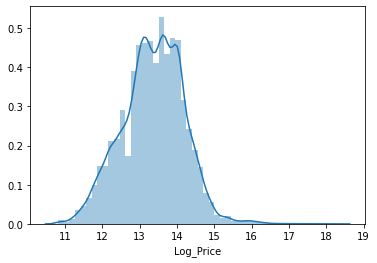

In [41]:
sns.distplot(df['Log_Price'])

In [42]:
q1 = df["KMs Driven"].quantile(0.99)
q1

1000000.0

In [43]:
df.columns

Index(['Brand', 'Condition', 'Fuel', 'KMs Driven', 'Model', 'Price',
       'Registered City', 'Transaction Type', 'Year', 'Log_Price'],
      dtype='object')

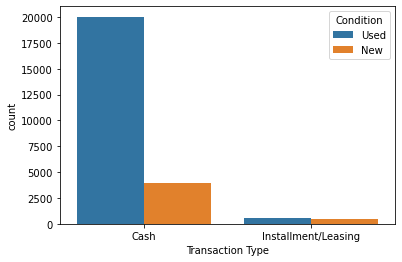

In [44]:
sns.countplot(x="Transaction Type", hue="Condition", data=df)

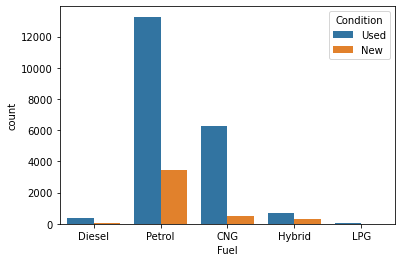

In [45]:
sns.countplot(x="Fuel", hue="Condition", data=df)

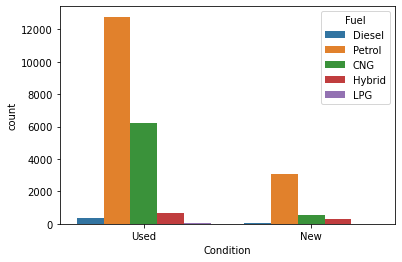

In [46]:
sns.countplot("Condition",hue="Fuel",data=df[df["Transaction Type"] == "Cash"])

In [47]:
df_cat = df[['Brand', 'Condition', 'Fuel', 'Model',
       'Registered City', 'Transaction Type']]

graph for Brand: total = 23


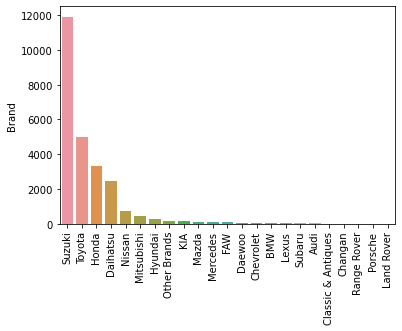

graph for Condition: total = 2


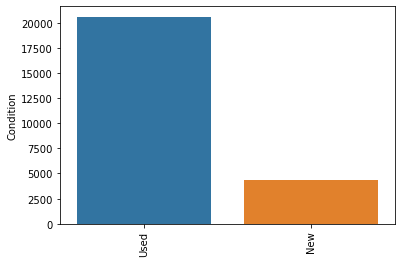

graph for Fuel: total = 5


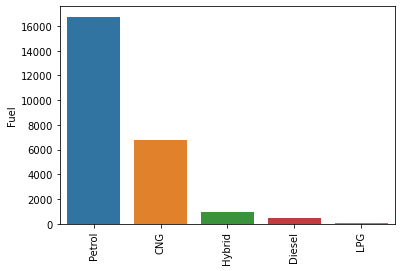

graph for Model: total = 303


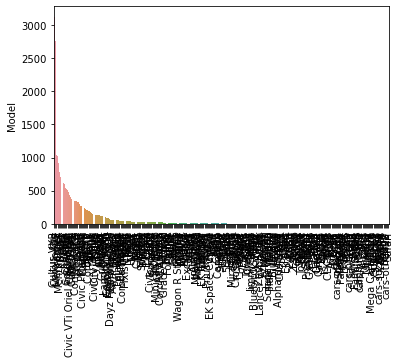

graph for Registered City: total = 61


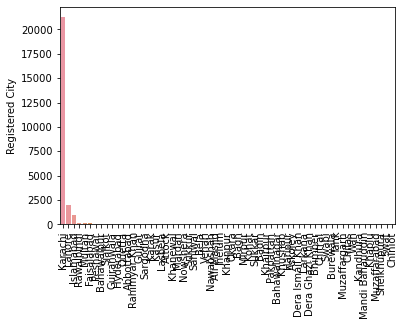

graph for Transaction Type: total = 2


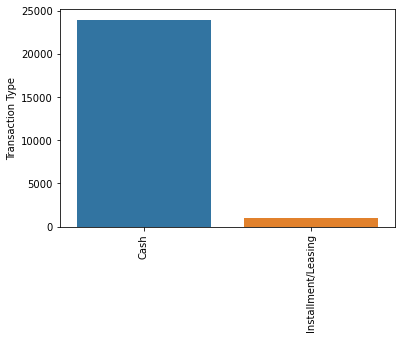

In [48]:
#it will give us bar chart of above defined categories and their value counts in every graph
#so this will be informative
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Model: total = 20


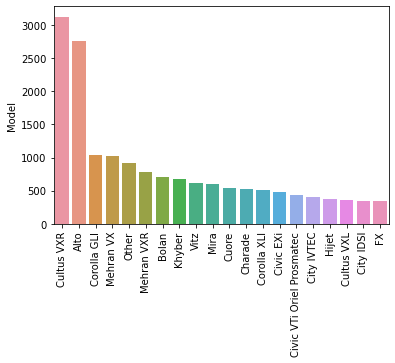

graph for Registered City: total = 20


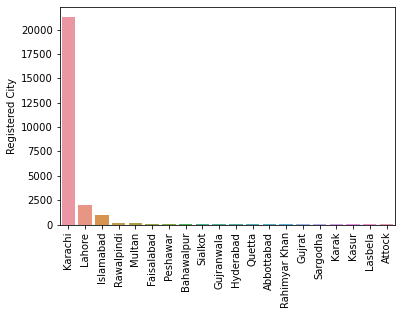

In [49]:
for i in df_cat[['Model','Registered City']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [50]:
pd.pivot_table(df[df['Year'] == 2015.0], index = 'Brand', columns = 'Year', aggfunc = 'count').sort_values('Brand', ascending = False)

,Condition,Fuel,KMs Driven,Log_Price,Model,Price,Registered City,Transaction Type
Year,2015.0,2015.0,2015.0,2015.0,2015.0,2015.0,2015.0,2015.0
Brand,,,,,,,,
Toyota,560,560,560,560,560,560,560,560
Suzuki,1524,1524,1524,1524,1524,1524,1524,1524
Other Brands,12,12,12,12,12,12,12,12
Nissan,107,107,107,107,107,107,107,107
Mitsubishi,25,25,25,25,25,25,25,25
Mercedes,2,2,2,2,2,2,2,2
Mazda,11,11,11,11,11,11,11,11
Lexus,1,1,1,1,1,1,1,1


In [51]:
pd.pivot_table(df[df['Year'] == 2007.0], index = 'Brand', columns = 'Year', aggfunc = 'count').sort_values('Brand', ascending = False)

,Condition,Fuel,KMs Driven,Log_Price,Model,Price,Registered City,Transaction Type
Year,2007.0,2007.0,2007.0,2007.0,2007.0,2007.0,2007.0,2007.0
Brand,,,,,,,,
Toyota,283,283,283,283,283,283,283,283
Suzuki,1809,1809,1809,1809,1809,1809,1809,1809
Subaru,1,1,1,1,1,1,1,1
Range Rover,2,2,2,2,2,2,2,2
Other Brands,11,11,11,11,11,11,11,11
Nissan,38,38,38,38,38,38,38,38
Mitsubishi,34,34,34,34,34,34,34,34
Mercedes,6,6,6,6,6,6,6,6


In [52]:
pd.pivot_table(df, index = 'Brand', columns = 'Transaction Type', values = 'Model', aggfunc = 'count').sort_values('Brand', ascending = False)

Transaction Type,Cash,Installment/Leasing
Brand,,
Toyota,4737.0,244.0
Suzuki,11542.0,368.0
Subaru,18.0,2.0
Range Rover,6.0,1.0
Porsche,1.0,1.0
Other Brands,169.0,19.0
Nissan,699.0,46.0
Mitsubishi,413.0,22.0
Mercedes,89.0,3.0


In [53]:
pd.pivot_table(df, index = ['Condition','Transaction Type'], values = 'Model', aggfunc = 'count')

Model
Condition Transaction Type          
New       Cash                  3924
          Installment/Leasing    441
Used      Cash                 20034
          Installment/Leasing    574

In [54]:
df.columns

Index(['Brand', 'Condition', 'Fuel', 'KMs Driven', 'Model', 'Price',
       'Registered City', 'Transaction Type', 'Year', 'Log_Price'],
      dtype='object')

In [55]:
pd.pivot_table(df, index = ['Condition','Brand'], values = 'Model', aggfunc = 'count').sort_values('Brand', ascending = False)

,,Model
Condition,Brand,
Used,Toyota,3749
New,Toyota,1232
Used,Suzuki,10450
New,Suzuki,1460
Used,Subaru,19
New,Subaru,1
Used,Range Rover,6
New,Range Rover,1
Used,Porsche,2


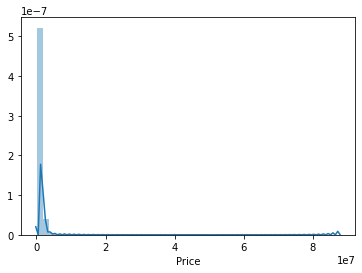

In [56]:
sns.distplot(df['Price'])

In [57]:
df

,Brand,Condition,Fuel,KMs Driven,Model,Price,Registered City,Transaction Type,Year,Log_Price
0,Toyota,Used,Diesel,1.0,Prado,2100000,Karachi,Cash,1997.0,14.557448
1,Suzuki,Used,Petrol,100000.0,Bolan,380000,Karachi,Cash,2006.0,12.847927
2,Suzuki,Used,CNG,12345.0,Bolan,340000,Karachi,Cash,1998.0,12.736701
3,Suzuki,Used,Petrol,94000.0,Alto,535000,Karachi,Cash,2010.0,13.190022
4,Toyota,Used,Petrol,100000.0,Corolla XLI,1430000,Karachi,Cash,2013.0,14.173185
...,...,...,...,...,...,...,...,...,...,...
24968,Toyota,Used,CNG,200000.0,Corolla XE,1070000,Lahore,Cash,2001.0,13.883169
24969,Daihatsu,New,Petrol,10000.0,Cuore,390000,Karachi,Cash,2004.0,12.873902
24970,Other Brands,Used,CNG,158715.0,Other,180000,Karachi,Cash,2000.0,12.100712
24971,Suzuki,Used,Petrol,1.0,Alto,470000,Rawalpindi,Cash,2003.0,13.060488


In [58]:
#So we will drop Price column
df.drop('Price', axis =1)

,Brand,Condition,Fuel,KMs Driven,Model,Registered City,Transaction Type,Year,Log_Price
0,Toyota,Used,Diesel,1.0,Prado,Karachi,Cash,1997.0,14.557448
1,Suzuki,Used,Petrol,100000.0,Bolan,Karachi,Cash,2006.0,12.847927
2,Suzuki,Used,CNG,12345.0,Bolan,Karachi,Cash,1998.0,12.736701
3,Suzuki,Used,Petrol,94000.0,Alto,Karachi,Cash,2010.0,13.190022
4,Toyota,Used,Petrol,100000.0,Corolla XLI,Karachi,Cash,2013.0,14.173185
...,...,...,...,...,...,...,...,...,...
24968,Toyota,Used,CNG,200000.0,Corolla XE,Lahore,Cash,2001.0,13.883169
24969,Daihatsu,New,Petrol,10000.0,Cuore,Karachi,Cash,2004.0,12.873902
24970,Other Brands,Used,CNG,158715.0,Other,Karachi,Cash,2000.0,12.100712
24971,Suzuki,Used,Petrol,1.0,Alto,Rawalpindi,Cash,2003.0,13.060488


In [59]:
df.to_csv('usedCarPrice_EDA.csv',index = False)

# Model Building

In [60]:
df_dum = pd.get_dummies(df[['Log_Price','Brand','Condition','KMs Driven','Model','Registered City', 'Transaction Type','Year']])
df_dum

,Log_Price,KMs Driven,Year,Brand_Audi,Brand_BMW,Brand_Changan,Brand_Chevrolet,Brand_Classic & Antiques,Brand_Daewoo,Brand_Daihatsu,...,Registered City_Sialkot,Registered City_Sukkar,Registered City_Sukkur,Registered City_Swabi,Registered City_Swat,Registered City_Tank,Registered City_Vehari,Registered City_Wah,Transaction Type_Cash,Transaction Type_Installment/Leasing
0,14.557448,1.0,1997.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,12.847927,100000.0,2006.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,12.736701,12345.0,1998.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,13.190022,94000.0,2010.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,14.173185,100000.0,2013.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24968,13.883169,200000.0,2001.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
24969,12.873902,10000.0,2004.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
24970,12.100712,158715.0,2000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
24971,13.060488,1.0,2003.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [61]:
X = df_dum.drop('Log_Price', axis =1)
y = df_dum.Log_Price.values

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Linear Regression

In [63]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred=(lr.predict(X_test))

In [64]:
acc_lin_reg = round( lr.score(X_train, y_train) * 100, 2)
print (str(acc_lin_reg) + ' percent')

75.89 percent


## Ridge Regression

In [65]:
ridge=Ridge()
ridge.fit(X,y)

Ridge()

In [66]:
ridge_prediction=ridge.predict(X_test)

In [67]:
acc_ri_reg = round( ridge.score(X_train, y_train) * 100, 2)
print (str(acc_ri_reg) + ' percent')

75.65 percent


## Lasso Regression

In [68]:
lasso = Lasso()
lasso.fit(X_train,y_train)
lasso_pred = (lasso.predict(X_test))

In [69]:
acc_lasso_reg = round( lasso.score(X_train, y_train) * 100, 2)
print (str(acc_lasso_reg) + ' percent')

36.21 percent


## Random Forest Regression

In [70]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

In [71]:
acc_rf_reg = round( rf.score(X_train, y_train) * 100, 2)
print (str(acc_rf_reg) + ' percent')

89.07 percent


## Decision Tree Regression

In [72]:
dtree=DecisionTreeRegressor()
dtree.fit(X_train,y_train)
dtree_pred = dtree.predict(X_test)

In [73]:
acc_dt_reg = round( dtree.score(X_train, y_train) * 100, 2)
print (str(acc_dt_reg) + ' percent')

90.77 percent


## Prediction of Price

In [74]:
df[df['KMs Driven'] == 73000.0]

,Brand,Condition,Fuel,KMs Driven,Model,Price,Registered City,Transaction Type,Year,Log_Price
11,Suzuki,Used,CNG,73000.0,Liana,535000,Karachi,Cash,2006.0,13.190022
44,Suzuki,New,CNG,73000.0,Mehran VXR,435000,Karachi,Cash,2009.0,12.983101
414,Honda,Used,Petrol,73000.0,Accord,985000,Karachi,Cash,2003.0,13.800397
665,Honda,Used,Petrol,73000.0,Civic VTi Oriel Prosmatec,1325000,Karachi,Cash,2011.0,14.096923
763,Suzuki,Used,Petrol,73000.0,Alto,525000,Karachi,Cash,2008.0,13.171154
...,...,...,...,...,...,...,...,...,...,...
22133,Suzuki,Used,Petrol,73000.0,Mehran VX,560000,Lahore,Cash,2013.0,13.235692
23299,Toyota,Used,Petrol,73000.0,Corolla XLI,1615000,Karachi,Cash,2015.0,14.294846
23997,Suzuki,Used,Petrol,73000.0,Mehran VX,390000,Lahore,Cash,2007.0,12.873902
24288,Daihatsu,Used,Petrol,73000.0,Cuore,785000,Karachi,Cash,2010.0,13.573439


In [75]:
X_test.iloc[29,:]

KMs Driven                              73000.0
Year                                     2008.0
Brand_Audi                                  0.0
Brand_BMW                                   0.0
Brand_Changan                               0.0
                                         ...   
Registered City_Tank                        0.0
Registered City_Vehari                      0.0
Registered City_Wah                         0.0
Transaction Type_Cash                       1.0
Transaction Type_Installment/Leasing        0.0
Name: 763, Length: 393, dtype: float64

In [76]:
round(np.exp(dtree.predict(np.array(list(X_test.iloc[29,:])).reshape(1,-1))[0]), 0)

525000.0

In [81]:
# predicting the price on new data
def predict_price(cat_cols,numeric_cols,Model):    
    
    x = np.zeros(len(X.columns))
    for i in range(len(numeric_cols)):
        x[i] = numeric_cols[i]
    for i in cat_cols:
        if i in X.columns:
            loc_index = np.where(X.columns==i)[0][0]
            x[loc_index] = 1
        else:
            pass
    
    return Model.predict([x])[0]

In [78]:
df

,Brand,Condition,Fuel,KMs Driven,Model,Price,Registered City,Transaction Type,Year,Log_Price
0,Toyota,Used,Diesel,1.0,Prado,2100000,Karachi,Cash,1997.0,14.557448
1,Suzuki,Used,Petrol,100000.0,Bolan,380000,Karachi,Cash,2006.0,12.847927
2,Suzuki,Used,CNG,12345.0,Bolan,340000,Karachi,Cash,1998.0,12.736701
3,Suzuki,Used,Petrol,94000.0,Alto,535000,Karachi,Cash,2010.0,13.190022
4,Toyota,Used,Petrol,100000.0,Corolla XLI,1430000,Karachi,Cash,2013.0,14.173185
...,...,...,...,...,...,...,...,...,...,...
24968,Toyota,Used,CNG,200000.0,Corolla XE,1070000,Lahore,Cash,2001.0,13.883169
24969,Daihatsu,New,Petrol,10000.0,Cuore,390000,Karachi,Cash,2004.0,12.873902
24970,Other Brands,Used,CNG,158715.0,Other,180000,Karachi,Cash,2000.0,12.100712
24971,Suzuki,Used,Petrol,1.0,Alto,470000,Rawalpindi,Cash,2003.0,13.060488


In [79]:
#cat_cols = ['Brand', 'Condition', 'Fuel', 'Model', 'Registered City', 'Transaction Type']
cat_cols = ['Toyota', 'Used', 'Diesel', 'Prado', 'Karachi', 'Cash']

# numeric_cols = ['KMs Driven', 'Year']
numeric_cols = [1.0, 1997.0]

In [84]:
np.exp(predict_price(cat_cols, numeric_cols, rf))

369129.37224791304

In [76]:
import pickle
with open('lr_car_price_model.pickle','wb') as f:
    pickle.dump(lr,f)

In [80]:
with open('ridge_car_price_model.pickle','wb') as f:
    pickle.dump(ridge,f)

In [81]:
with open('rf_car_price_model.pickle','wb') as f:
    pickle.dump(rf,f)

In [82]:
with open('dtree_car_price_model.pickle','wb') as f:
    pickle.dump(dtree,f)

In [83]:
import json
cat_feature_columns = {
    "data_columns" : [col for col in X.columns],
}

with open("columns.json", "w") as f:
    f.write(json.dumps(cat_feature_columns))